**Predict the percentage of an student based on the no. of hours**

This is a simple linear regression task as it involves just 2 variables.

Solution

In [1]:
 !pip install matplotlib-venn 
!pip install pandas
import numpy as np
import pandas as pd
import matplotlib_venn as plt
import matplotlib.pyplot as plot
%matplotlib inline
import io


**Importing Dataset**






In [2]:
df = pd.read_csv('http://bit.ly/w-data')

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


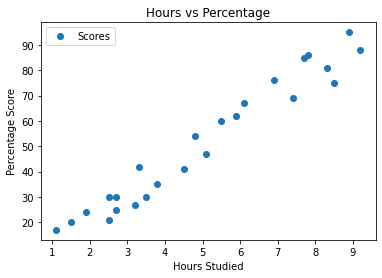

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plot.title('Hours vs Percentage')  
plot.xlabel('Hours Studied')  
plot.ylabel('Percentage Score')  
plot.show()

Clearly,there is positive linear regression between number of hours studied and scores obtained

In [7]:
#Dividing the dataset to dependent and independent variables
X = df.iloc[:, :-1].values  
X
y = df.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Training the Algorithm** 

In [9]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


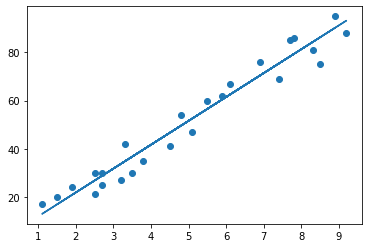

In [10]:
# Visualising the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plot.scatter(X, y)
plot.plot(X, line);
plot.show()

Retrieving intercept and coefficient

In [11]:
print("Intercept is: ",reg.intercept_)
print("Coefficient is: ",reg.coef_)

Intercept is:  2.018160041434662
Coefficient is:  [9.91065648]


This Calculation shows that if a student studies one hour more than they previously studied for an exam ,they can expect to achieve an increase of 9.91% 
in the score achieved by the student previously.

In [12]:
#predicting on testing data
y_pred =reg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Here Y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

In [14]:
#Comparing the actual vs Predicted valies for X_test
dframe=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dframe

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


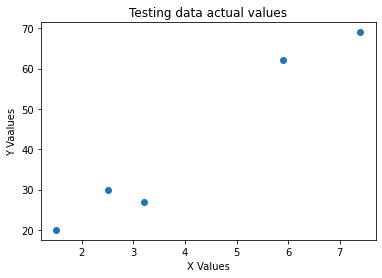

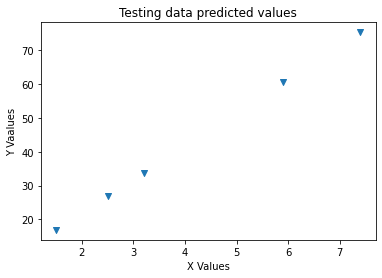

In [15]:
#visualising predicted and actual values
plot.scatter(X_test,y_test)
plot.xlabel('X Values')
plot.ylabel('Y Vaalues')
plot.title('Testing data actual values')
plot.show()
plot.scatter(X_test,y_pred,marker='v')
plot.xlabel('X Values')
plot.ylabel('Y Vaalues')
plot.title('Testing data predicted values')
plot.show()

**Evaluating the Algorithm**

Evaluating the regression algorithm with three common metrics- Mean Absolute Error,mean squared Error and Root Mean Squared Error

In [16]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
